In [ ]:
noaanum = 11158

result_dir = f"/userhome/jeon_mg/workspace/series_result/{noaanum}"

In [ ]:
import os

In [ ]:
result_pickle = os.path.join(result_dir, "series_result.pickle")
result_pickle

'/userhome/jeon_mg/workspace/series_result/11158/series_result.pickle'

In [ ]:
import pickle

In [ ]:
with open(result_pickle, "rb") as f:
    series_results = pickle.load(f)

In [ ]:
series_results.keys()

dict_keys(['date', 'total_free_energy', 'total_energy', 'loss_force_free', 'loss_force_free_mean', 'loss_div_free', 'loss_div_free_mean', 'sigma_J', 'theta_J', 'theta_i_mean', 'norm_laplacian_B_mean', 'max_idx_0', 'norm_laplacian_B_max_0', 'max_idx_1', 'norm_laplacian_B_max_1', 'max_idx_2', 'norm_laplacian_B_max_2', 'max_idx_3', 'norm_laplacian_B_max_3', 'max_idx_4', 'norm_laplacian_B_max_4', 'max_idx_5', 'norm_laplacian_B_max_5', 'total_energy_pot', 'loss_force_free_pot', 'loss_force_free_mean_pot', 'loss_div_free_pot', 'loss_div_free_mean_pot', 'sigma_J_pot', 'theta_J_pot', 'theta_i_mean_pot', 'norm_laplacian_B_mean_pot', 'max_idx_0_pot', 'norm_laplacian_B_max_0_pot', 'max_idx_1_pot', 'norm_laplacian_B_max_1_pot', 'max_idx_2_pot', 'norm_laplacian_B_max_2_pot', 'max_idx_3_pot', 'norm_laplacian_B_max_3_pot', 'max_idx_4_pot', 'norm_laplacian_B_max_4_pot', 'max_idx_5_pot', 'norm_laplacian_B_max_5_pot'])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter, date2num
from sunpy.net import Fido
from sunpy.net import attrs as a

In [ ]:
flares = Fido.search(
    a.Time(min(series_results["date"]), max(series_results["date"])),
    a.hek.EventType("FL"),
    a.hek.OBS.Observatory == "GOES",
)["hek"]

filtered_results = flares[
    "event_starttime", "event_peaktime", "event_endtime", "fl_goescls", "ar_noaanum"
]
filtered_results_noaa = filtered_results[filtered_results["ar_noaanum"] == noaanum]

In [ ]:
filtered_results_noaa

event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum
Time,Time,Time,str4,int64
2011-02-13 12:29:00.000,2011-02-13 12:36:00.000,2011-02-13 12:46:00.000,C1.1,11158
2011-02-13 13:44:00.000,2011-02-13 13:56:00.000,2011-02-13 14:11:00.000,C4.7,11158
2011-02-13 17:28:00.000,2011-02-13 17:38:00.000,2011-02-13 17:47:00.000,M6.6,11158
2011-02-14 02:35:00.000,2011-02-14 02:42:00.000,2011-02-14 02:46:00.000,C1.6,11158
2011-02-14 04:29:00.000,2011-02-14 04:49:00.000,2011-02-14 05:09:00.000,C8.3,11158
2011-02-14 06:51:00.000,2011-02-14 06:58:00.000,2011-02-14 07:03:00.000,C6.6,11158
2011-02-14 08:39:00.000,2011-02-14 08:49:00.000,2011-02-14 09:04:00.000,C1.8,11158
2011-02-14 11:51:00.000,2011-02-14 12:00:00.000,2011-02-14 12:26:00.000,C1.7,11158
2011-02-14 12:41:00.000,2011-02-14 12:53:00.000,2011-02-14 12:58:00.000,C9.4,11158


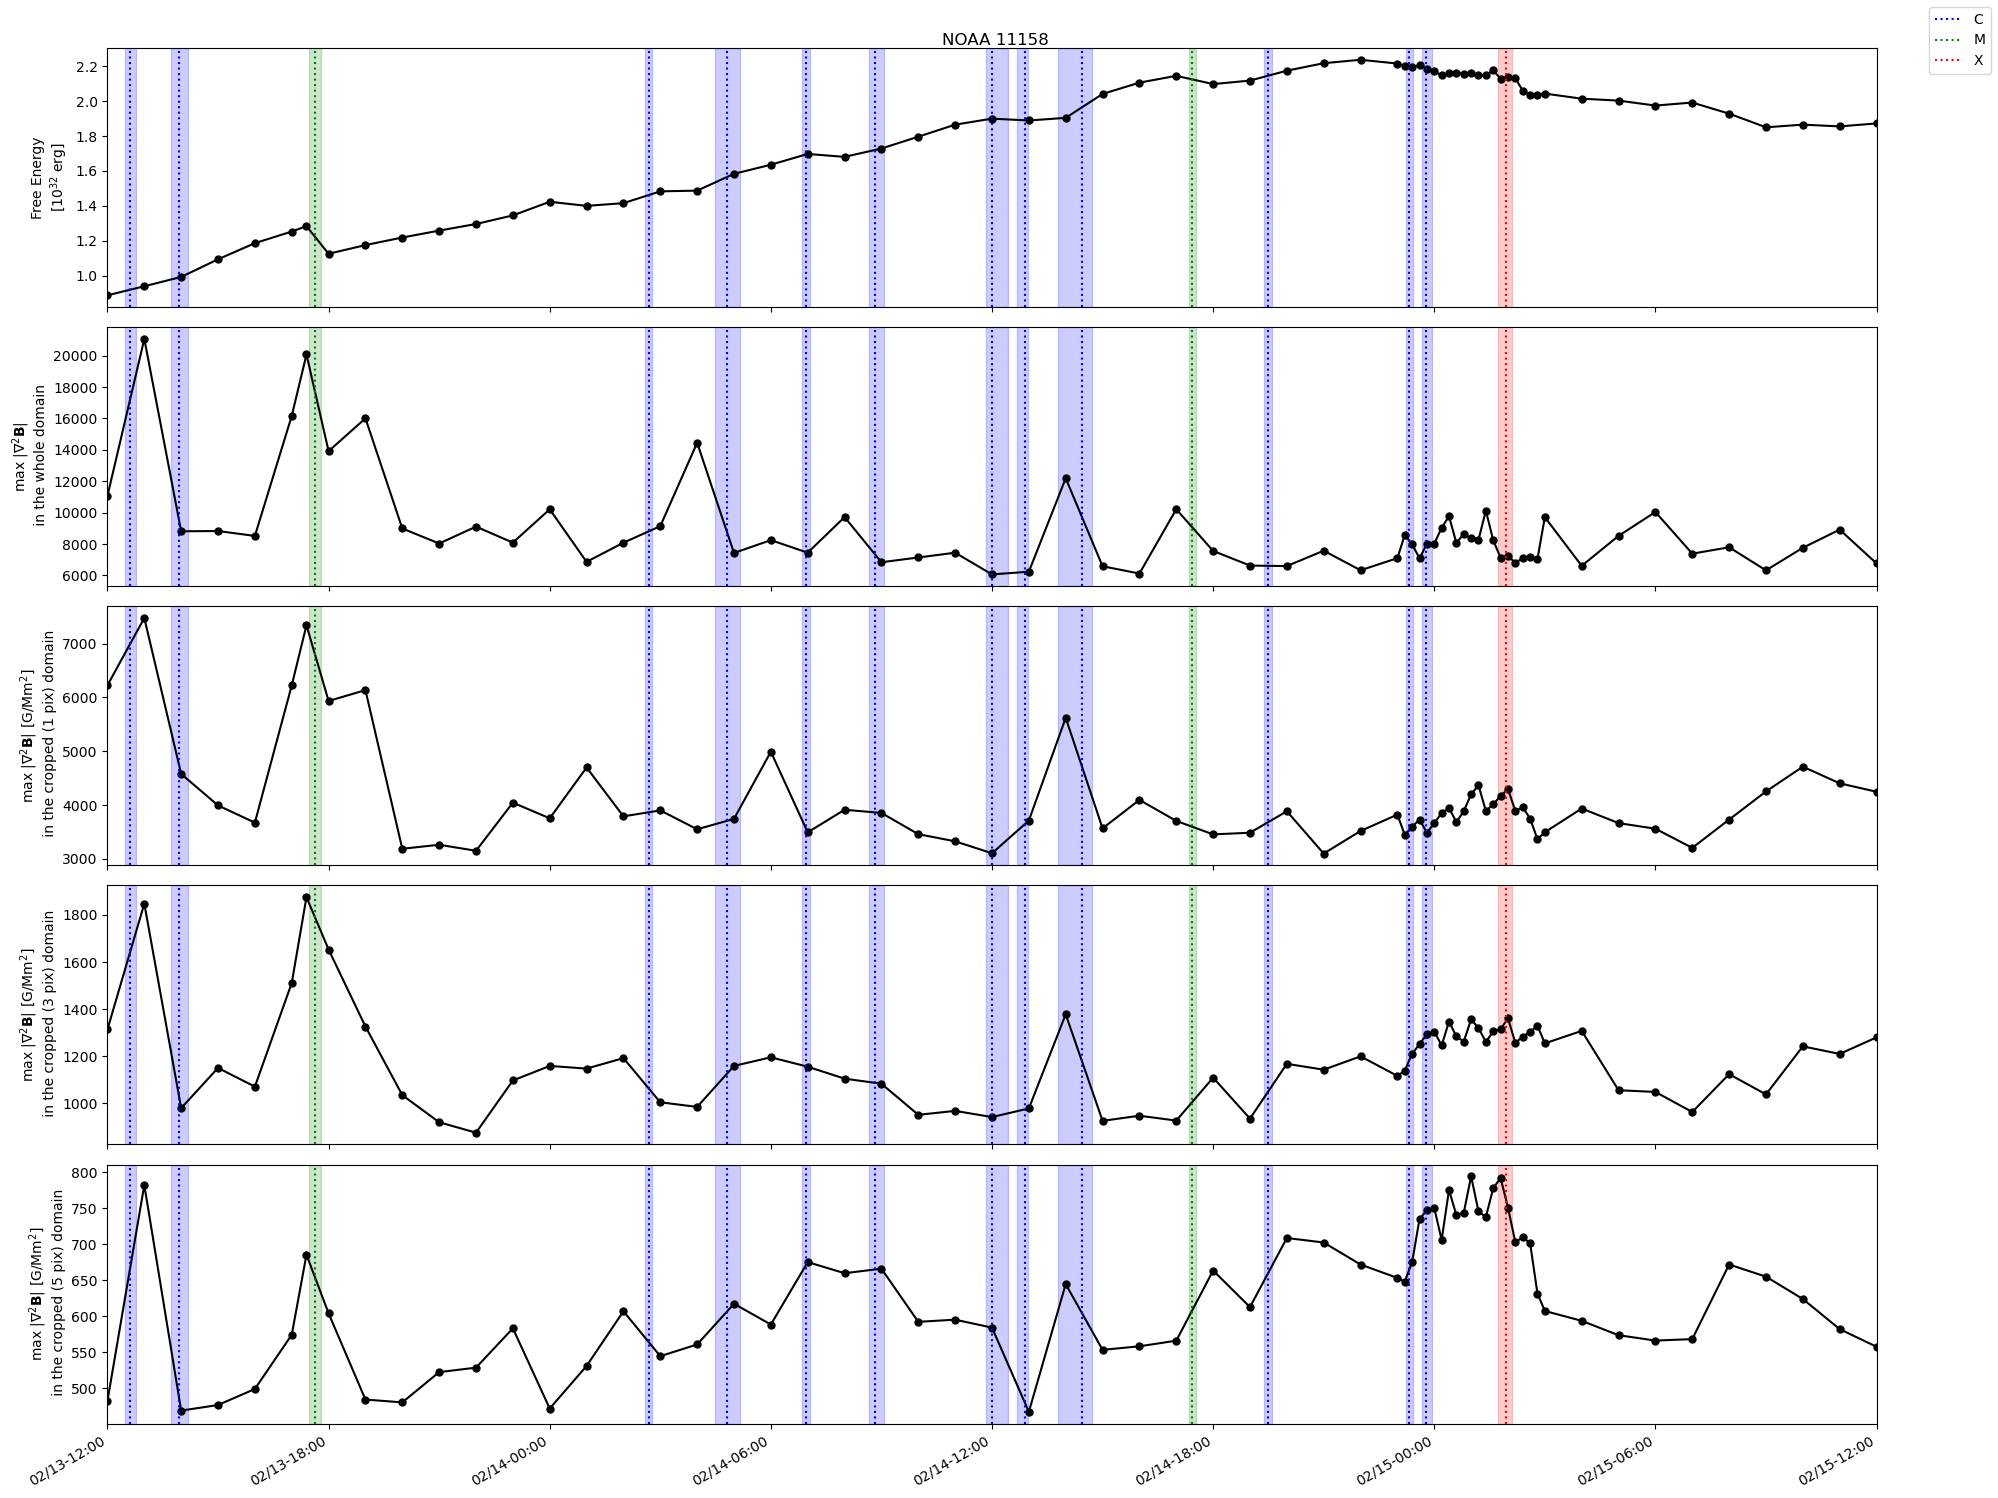

In [ ]:
x_dates = date2num(series_results["date"])
date_format = DateFormatter("%m/%d-%H:%M")

fig, full_axs = plt.subplots(
    5, 2, figsize=(20, 15), gridspec_kw={"width_ratios": [1, 0.05]}
)
axs = full_axs[:, 0]
[ax.axis("off") for ax in full_axs[:, 1]]

for ax in axs:
    ax.xaxis_date()
    ax.set_xlim(x_dates[0], x_dates[-1])
    ax.xaxis.set_major_formatter(date_format)

fig.autofmt_xdate()

msize = 5

ax = axs[0]
ax.plot(
    x_dates,
    np.array(series_results["total_free_energy"]) * 1e-32,
    "ko-",
    markersize=msize,
)
ax.set_ylabel("Free Energy\n[$10^{32}$ erg]")

ax = axs[1]
ax.plot(
    x_dates, np.array(series_results["norm_laplacian_B_max_0"]), "ko-", markersize=msize
)
ax.set_ylabel("max " + r"|$\nabla^2 \mathbf{B}$|" + "\n in the whole domain")

ax = axs[2]
# The cropped (1 pix) domain is the domain whose border (1 pixel) is removed
# to reduce the boundary effect of the finite difference method.
ax.plot(
    x_dates,
    np.array(series_results["norm_laplacian_B_max_1"]),
    "ko-",
    markersize=msize,
)
ax.set_ylabel(
    "max "
    + r"|$\nabla^2 \mathbf{B}$|"
    + " [G/Mm$^2$]"
    + "\n in the cropped (1 pix) domain"
)

ax = axs[3]
# The cropped (3 pix) domain is the domain whose border (3 pixel) is removed
# to reduce the boundary effect of the finite difference method.
ax.plot(
    x_dates,
    np.array(series_results["norm_laplacian_B_max_3"]),
    "ko-",
    markersize=msize,
)
ax.set_ylabel(
    "max "
    + r"|$\nabla^2 \mathbf{B}$|"
    + " [G/Mm$^2$]"
    + "\n in the cropped (3 pix) domain"
)

ax = axs[4]
# The cropped (5 pix) domain is the domain whose border (5 pixel) is removed
# to reduce the boundary effect of the finite difference method.
ax.plot(
    x_dates,
    np.array(series_results["norm_laplacian_B_max_5"]),
    "ko-",
    markersize=msize,
)
ax.set_ylabel(
    "max "
    + r"|$\nabla^2 \mathbf{B}$|"
    + " [G/Mm$^2$]"
    + "\n in the cropped (5 pix) domain"
)

my_labels = {"X": "X", "M": "M", "C": "C"}
for st, pt, et, cl in zip(
    filtered_results_noaa["event_starttime"],
    filtered_results_noaa["event_peaktime"],
    filtered_results_noaa["event_endtime"],
    filtered_results_noaa["fl_goescls"],
):
    if cl[0] == "X":
        for ax in axs:
            ax.axvline(
                x=date2num(pt.datetime),
                linestyle="dotted",
                c="red",
                label=my_labels["X"],
            )
            ax.axvspan(
                date2num(st.datetime),
                date2num(et.datetime),
                alpha=0.2,
                color="red",
            )
            my_labels["X"] = "_nolegend_"
    elif cl[0] == "M":
        for ax in axs:
            ax.axvline(
                x=date2num(pt.datetime),
                linestyle="dotted",
                c="green",
                label=my_labels["M"],
            )
            ax.axvspan(
                date2num(st.datetime),
                date2num(et.datetime),
                alpha=0.2,
                color="green",
            )
            my_labels["M"] = "_nolegend_"
    elif cl[0] == "C":
        for ax in axs:
            ax.axvline(
                x=date2num(pt.datetime),
                linestyle="dotted",
                c="blue",
                label=my_labels["C"],
            )
            ax.axvspan(
                date2num(st.datetime),
                date2num(et.datetime),
                alpha=0.2,
                color="blue",
            )
            my_labels["C"] = "_nolegend_"

fig.suptitle(f"NOAA {noaanum}")
fig.legend()
plt.tight_layout()

$$
\sigma_J = \frac{\sum_i \frac{|\vec{J}_i \times \vec{B}_i|}{B_i} }{\sum_i J_i} = \frac{\sum_i J_i \sigma_i}{\sum_i J_i}
$$

$$
\sigma_i = \frac{|\vec{J}_i \times \vec{B}_i|}{J_i B_i}
$$

$$
\theta_J = \arcsin (\sigma_J)
$$

$$
\theta_i = \arcsin (\sigma_i)
$$

$<\theta_i>$ denotes the average angle over all grid points

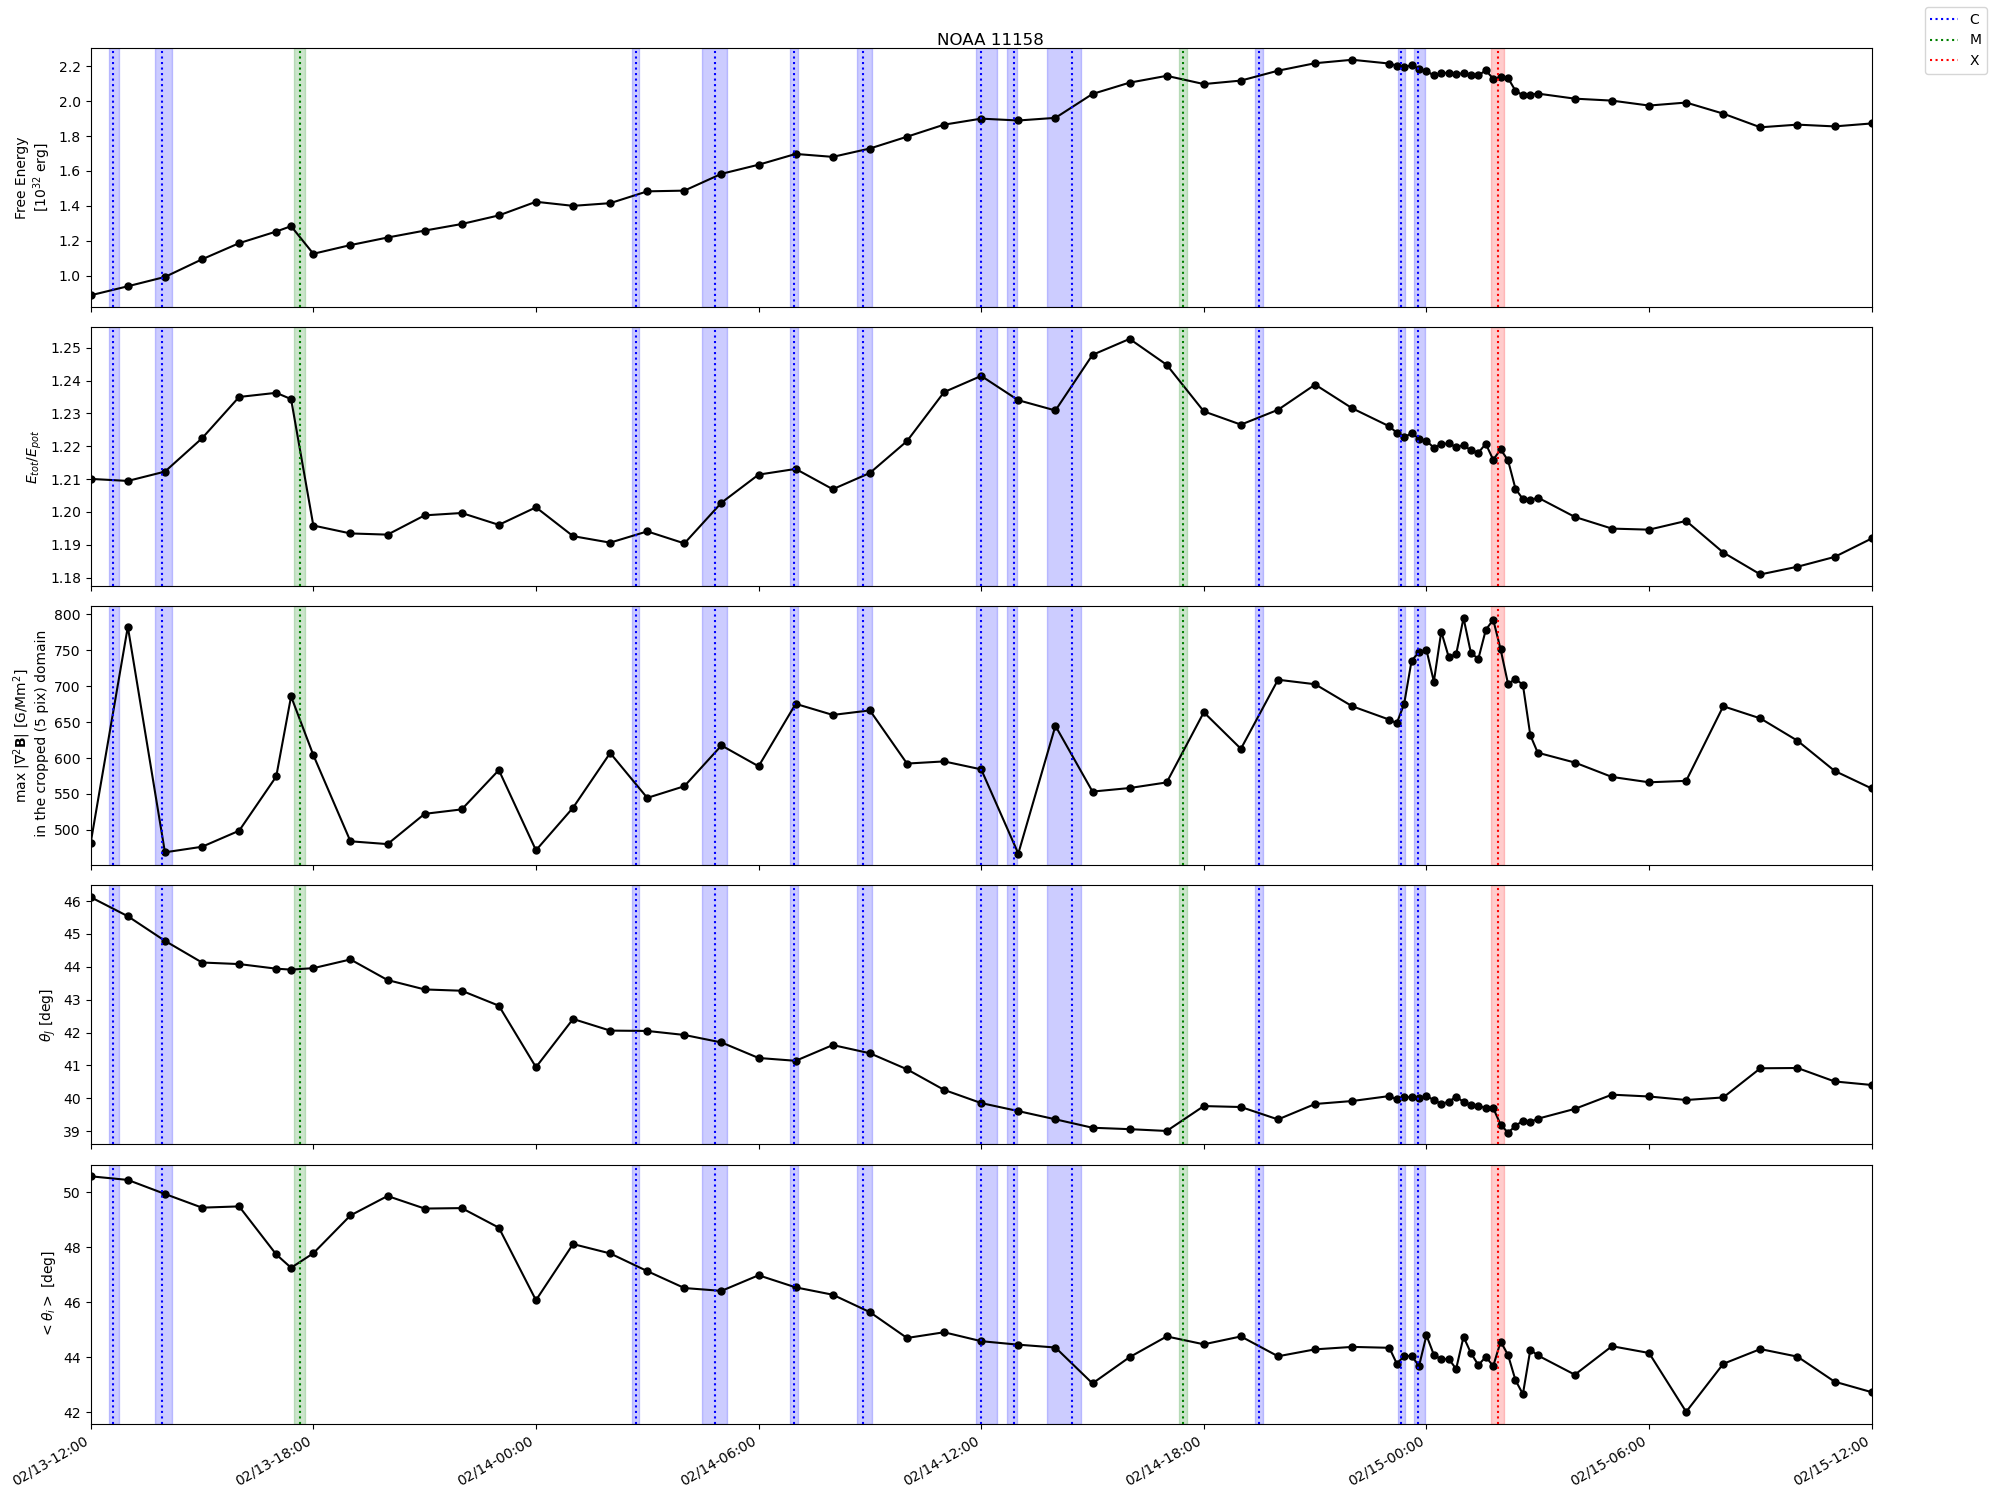

In [ ]:
x_dates = date2num(series_results["date"])
date_format = DateFormatter("%m/%d-%H:%M")

fig, full_axs = plt.subplots(
    5, 2, figsize=(20, 15), gridspec_kw={"width_ratios": [1, 0.05]}
)
axs = full_axs[:, 0]
[ax.axis("off") for ax in full_axs[:, 1]]

for ax in axs:
    ax.xaxis_date()
    ax.set_xlim(x_dates[0], x_dates[-1])
    ax.xaxis.set_major_formatter(date_format)

fig.autofmt_xdate()

msize = 5

ax = axs[0]
ax.plot(
    x_dates,
    np.array(series_results["total_free_energy"]) * 1e-32,
    "ko-",
    markersize=msize,
)
ax.set_ylabel("Free Energy\n[$10^{32}$ erg]")

ax = axs[1]
ax.plot(
    x_dates,
    np.array(series_results["total_energy"])
    / np.array(series_results["total_energy_pot"]),
    "ko-",
    markersize=msize,
)
ax.set_ylabel(r"$ E_{tot} / E_{pot} $ ")

ax = axs[2]
# The cropped (5 pix) domain is the domain whose border (5 pixel) is removed
# to reduce the boundary effect of the finite difference method.
ax.plot(
    x_dates,
    np.array(series_results["norm_laplacian_B_max_5"]),
    "ko-",
    markersize=msize,
)
ax.set_ylabel(
    "max "
    + r"|$\nabla^2 \mathbf{B}$|"
    + " [G/Mm$^2$]"
    + "\n in the cropped (5 pix) domain"
)

ax = axs[3]
ax.plot(
    x_dates,
    np.array(series_results["theta_J"]),
    "ko-",
    markersize=msize,
)
ax.set_ylabel(r"$\theta_J$" + " [deg]")

ax = axs[4]
ax.plot(
    x_dates,
    np.array(series_results["theta_i_mean"]),
    "ko-",
    markersize=msize,
)
ax.set_ylabel(r"$<\theta_i>$" + " [deg]")

my_labels = {"X": "X", "M": "M", "C": "C"}
for st, pt, et, cl in zip(
    filtered_results_noaa["event_starttime"],
    filtered_results_noaa["event_peaktime"],
    filtered_results_noaa["event_endtime"],
    filtered_results_noaa["fl_goescls"],
):
    if cl[0] == "X":
        for ax in axs:
            ax.axvline(
                x=date2num(pt.datetime),
                linestyle="dotted",
                c="red",
                label=my_labels["X"],
            )
            ax.axvspan(
                date2num(st.datetime),
                date2num(et.datetime),
                alpha=0.2,
                color="red",
            )
            my_labels["X"] = "_nolegend_"
    elif cl[0] == "M":
        for ax in axs:
            ax.axvline(
                x=date2num(pt.datetime),
                linestyle="dotted",
                c="green",
                label=my_labels["M"],
            )
            ax.axvspan(
                date2num(st.datetime),
                date2num(et.datetime),
                alpha=0.2,
                color="green",
            )
            my_labels["M"] = "_nolegend_"
    elif cl[0] == "C":
        for ax in axs:
            ax.axvline(
                x=date2num(pt.datetime),
                linestyle="dotted",
                c="blue",
                label=my_labels["C"],
            )
            ax.axvspan(
                date2num(st.datetime),
                date2num(et.datetime),
                alpha=0.2,
                color="blue",
            )
            my_labels["C"] = "_nolegend_"

fig.suptitle(f"NOAA {noaanum}")
fig.legend()
plt.tight_layout()